#### Decision Tree Classisfier and Random Forest 

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [20]:
# Loading the dataset
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [21]:
df.shape

(1025, 14)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [23]:
target_col = 'target'

X = df.drop(columns=[target_col])
y = df[target_col]
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print('Decision Tree test acc:', accuracy_score(y_test, dt.predict(X_test)))

Decision Tree test acc: 0.9853658536585366


In [25]:
# Overfitting analysis
train_scores = []
test_scores = []
max_depths = range(1, 16)
for d in max_depths:
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    train_scores.append(m.score(X_train, y_train))
    test_scores.append(m.score(X_test, y_test))

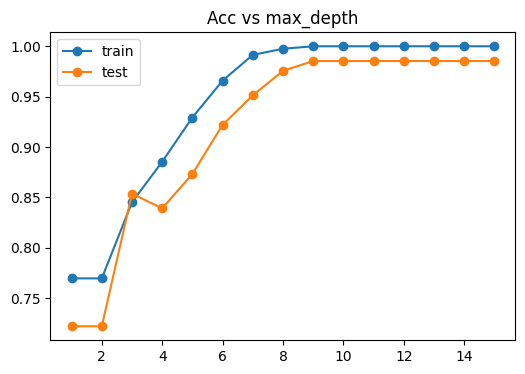

In [26]:
plt.figure(figsize=(6,4))
plt.plot(list(max_depths), train_scores, marker='o', label='train')
plt.plot(list(max_depths), test_scores, marker='o', label='test')
plt.legend(); plt.title('Acc vs max_depth'); plt.show()

In [27]:

best_depth = int(np.argmax(test_scores))+1
print('Best depth by test acc:', best_depth)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print('Random Forest test acc:', accuracy_score(y_test, rf.predict(X_test)))

fi_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Top features (RF):\n', fi_rf.head(10))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print('Decision Tree CV mean acc:', cross_val_score(DecisionTreeClassifier(max_depth=best_depth, random_state=42), X, y, cv=cv).mean())
print('Random Forest CV mean acc:', cross_val_score(RandomForestClassifier(n_estimators=200, random_state=42), X, y, cv=cv).mean())

Best depth by test acc: 9
Random Forest test acc: 1.0
Top features (RF):
 cp          0.144796
thalach     0.118097
ca          0.110965
oldpeak     0.105590
thal        0.101825
age         0.091826
chol        0.076579
exang       0.074189
trestbps    0.071178
slope       0.045234
dtype: float64
Decision Tree CV mean acc: 0.9970731707317073
Random Forest CV mean acc: 0.9960975609756098
